# Cluster high titer strains
1) Preprocess the data.
2) Get `N_HIGH` strains.
3) Use built in hierarchical clustering functions to get clusters from highest strains.
4) Calculate differentially expressed proteins for each top strain (using volcano plot function).
5) Do clustering using only DEPs.
6) Compare clustering results.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
from matplotlib import cm

In [3]:
# !pip install adjustText
# from adjustText import adjust_text

In [72]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 19.6 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from scipy.spatial.distance import squareform, pdist

In [5]:
N_HIGH = 30

## Import data

In [6]:
data_file = './data/normalized_proteomics_pivot.csv'
data_file = './data/normalized_proteomics_pivot_c0-c6.csv'
omics = pd.read_csv(data_file, index_col=0)
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Drop wierd runs from C3

In [7]:
omics = omics.drop(['PP_0815_PP_1317-R1_c3',
                    'PP_0815_PP_1317-R2_c3',
                    'PP_0815_PP_1317-R3_c3',
                    'PP_1317-R1_c3',
                    'PP_1317-R2_c3',
                    'PP_1317-R3_c3'
                   ]
                  )

## Merge means by replicate

### Drop rows/columns with missing data

In [8]:
omics.loc[omics['isoprenol'].isna(), 'isoprenol']
omics = omics.dropna(axis = 0, how = 'any', subset=['isoprenol'])
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


In [9]:
omics = omics.dropna(axis = 1, how = 'any')
omics

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Merge by replicate

In [10]:
omics_mean = omics.copy()
omics_mean['cycle'] = [x[-1] for x in omics_mean.index.values]
omics_mean['line_name'] = [f"{x.split('-')[0]}_c{x[-1]}" for x in omics_mean.index.values]
omics_mean['is_control'] = ['ontrol' in x for x in omics_mean['line_name']]
omics_mean.loc[omics_mean['is_control'], 'line_name'] = omics_mean.loc[
    omics_mean['is_control'], 'line_name'].apply(lambda x: f'Control_c{x[-1]}')
omics_metadata = omics_mean[['cycle', 'is_control']].copy()
omics_mean = omics_mean.drop(['cycle', 'is_control'], axis = 1)

omics_mean = omics_mean.groupby('line_name').mean()
omics_mean.shape

(472, 1646)

In [11]:
print(f"Number of measurements per cycle:\n{omics_metadata['cycle'].value_counts()}")

Number of measurements per cycle:
cycle
0    387
1    192
2    192
6    189
5    186
4    183
3    177
Name: count, dtype: int64


In [12]:
protein_measurements = omics.columns[:-1]
protein_measurements.shape

(1645,)

In [13]:
X = omics[protein_measurements]
y = omics['isoprenol']
X_mean = omics_mean[protein_measurements]
y_mean = omics_mean['isoprenol']
X

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.950618,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.020609,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.985870,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.029636,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.063534,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.685504,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.680503,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.678373,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907


In [14]:
omics_index = omics.index.values
cycle_label = [int(x[-1]) for x in omics_index]
num_grna = [x.count('PP') for x in omics_index]
is_control = [1 if 'ontrol' in x else 0 for x in omics_index]

### Scale data for ML

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm
X_norm_df = X.copy()
X_norm_df.iloc[:,:] = X_norm
X_norm_df

scaler2 = StandardScaler()
X_mean_norm = scaler2.fit_transform(X_mean)
X_mean_norm_df = X_mean.copy()
X_mean_norm_df.iloc[:,:] = X_mean_norm

I have 6 relevant variables:
- X_norm: normalized/scaled protein measurements for each rep
- X_mean_norm: mean of 3 replicates normalized/scaled protein measurements
- y/y_mean: isoprenol (normalized to control) for each rep/mean of 3 reps
- omics: Initial dataframe
- omics_mean: Initial dataframe but mean of 3 reps

## Coloring my data by titer-category

Can add a color to each row/column in the clustergram indicating some other variable - here I'll use titer

## Plot distribution of titers with thershold for top N titers

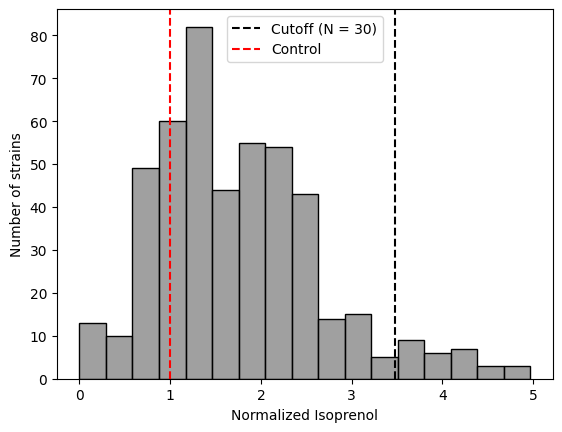

In [16]:
high_idx_mean = np.argpartition(y_mean, -N_HIGH)[-N_HIGH:]
high_values_mean = y_mean.iloc[high_idx_mean]
control_idx_mean = np.where(
    np.array(
        ['ontrol' in x for x in X_mean_norm_df.index.values]
    )
)[0]
fig, ax = plt.subplots()
sns.histplot(
    data = y_mean,
    ax = ax,
    color = 'grey' 
)
ax.set_xlabel('Normalized Isoprenol')
ax.set_ylabel('Number of strains')
ax.axvline(np.min(high_values_mean), c= 'k', linestyle = '--', label = f'Cutoff (N = {N_HIGH})')
ax.axvline(np.mean(y_mean.iloc[control_idx_mean]), c = 'r', linestyle = '--', label = 'Control')
ax.legend()

/tmp/ipykernel_3054/4057527047.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  titer_category_df = pd.DataFrame(y_mean[plot_idx])
/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


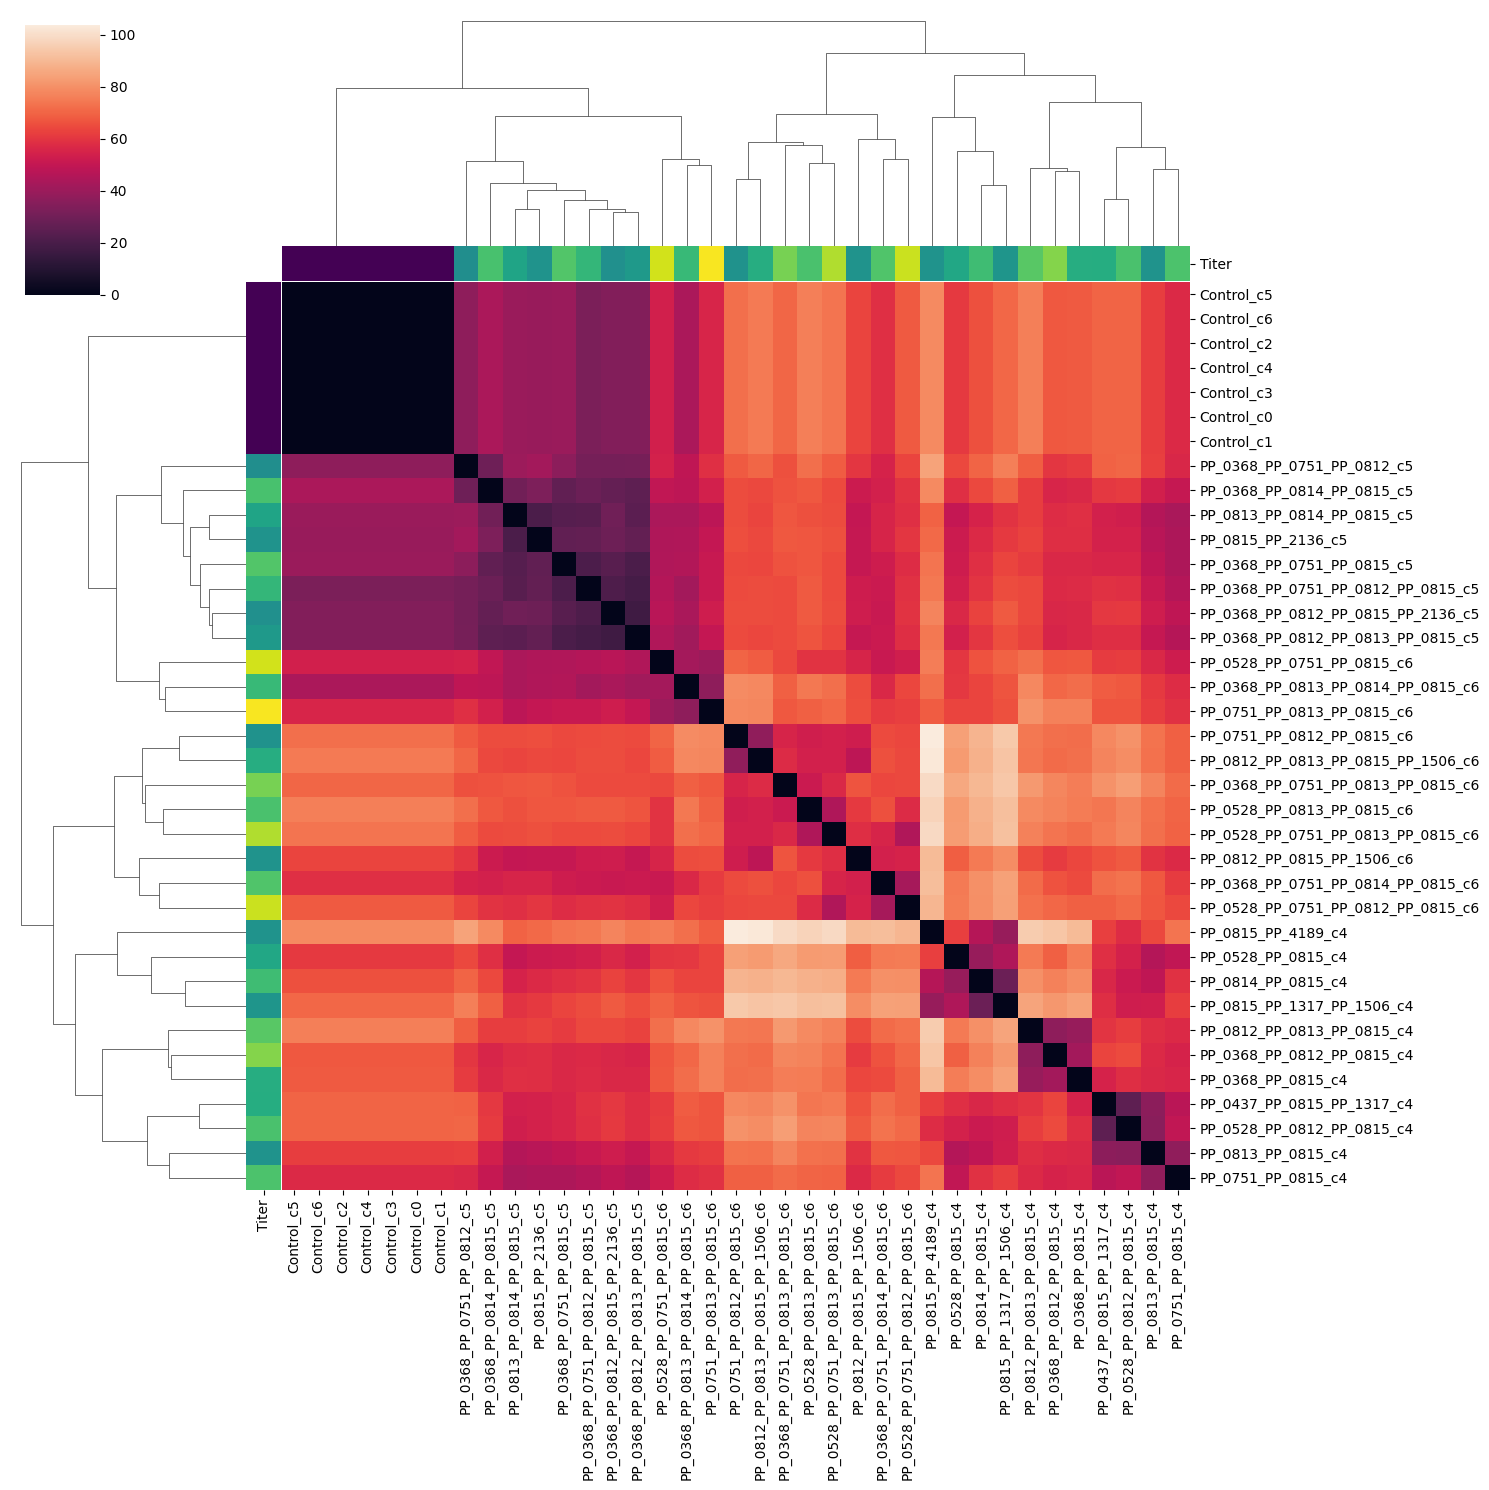

In [17]:
high_idx_mean = np.argpartition(y_mean, -N_HIGH)[-N_HIGH:]
high_values_mean = y_mean.iloc[high_idx_mean]

control_idx_mean = np.where(
    np.array(
        ['ontrol' in x for x in X_mean_norm_df.index.values]
    )
)[0]

plot_idx = np.hstack([control_idx_mean, high_idx_mean])
high_dmat_compressed = pdist(X_mean_norm[plot_idx,:])
high_dmat = squareform(high_dmat_compressed)

titer_category_df = pd.DataFrame(y_mean[plot_idx])

scalar_map = cm.ScalarMappable(
    norm = mpl.colors.Normalize(vmin =2, vmax = 5),
    cmap = plt.get_cmap('viridis'),
)

titer_category_df.loc[:,'c_cont'] = titer_category_df['isoprenol'].apply(lambda x: scalar_map.to_rgba(x))
titer_colors = pd.Series(titer_category_df.loc[:,'c_cont'])
titer_colors.name = 'Titer'

high_dist_df = pd.DataFrame(data = high_dmat, columns = X_mean.index.values[plot_idx], index = X_mean.index.values[plot_idx])
c = sns.clustermap(
    data = high_dist_df,
    row_colors = titer_colors, 
    col_colors=titer_colors,
    figsize=(15,15)
)

/tmp/ipykernel_3054/4057527047.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  titer_category_df = pd.DataFrame(y_mean[plot_idx])
/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


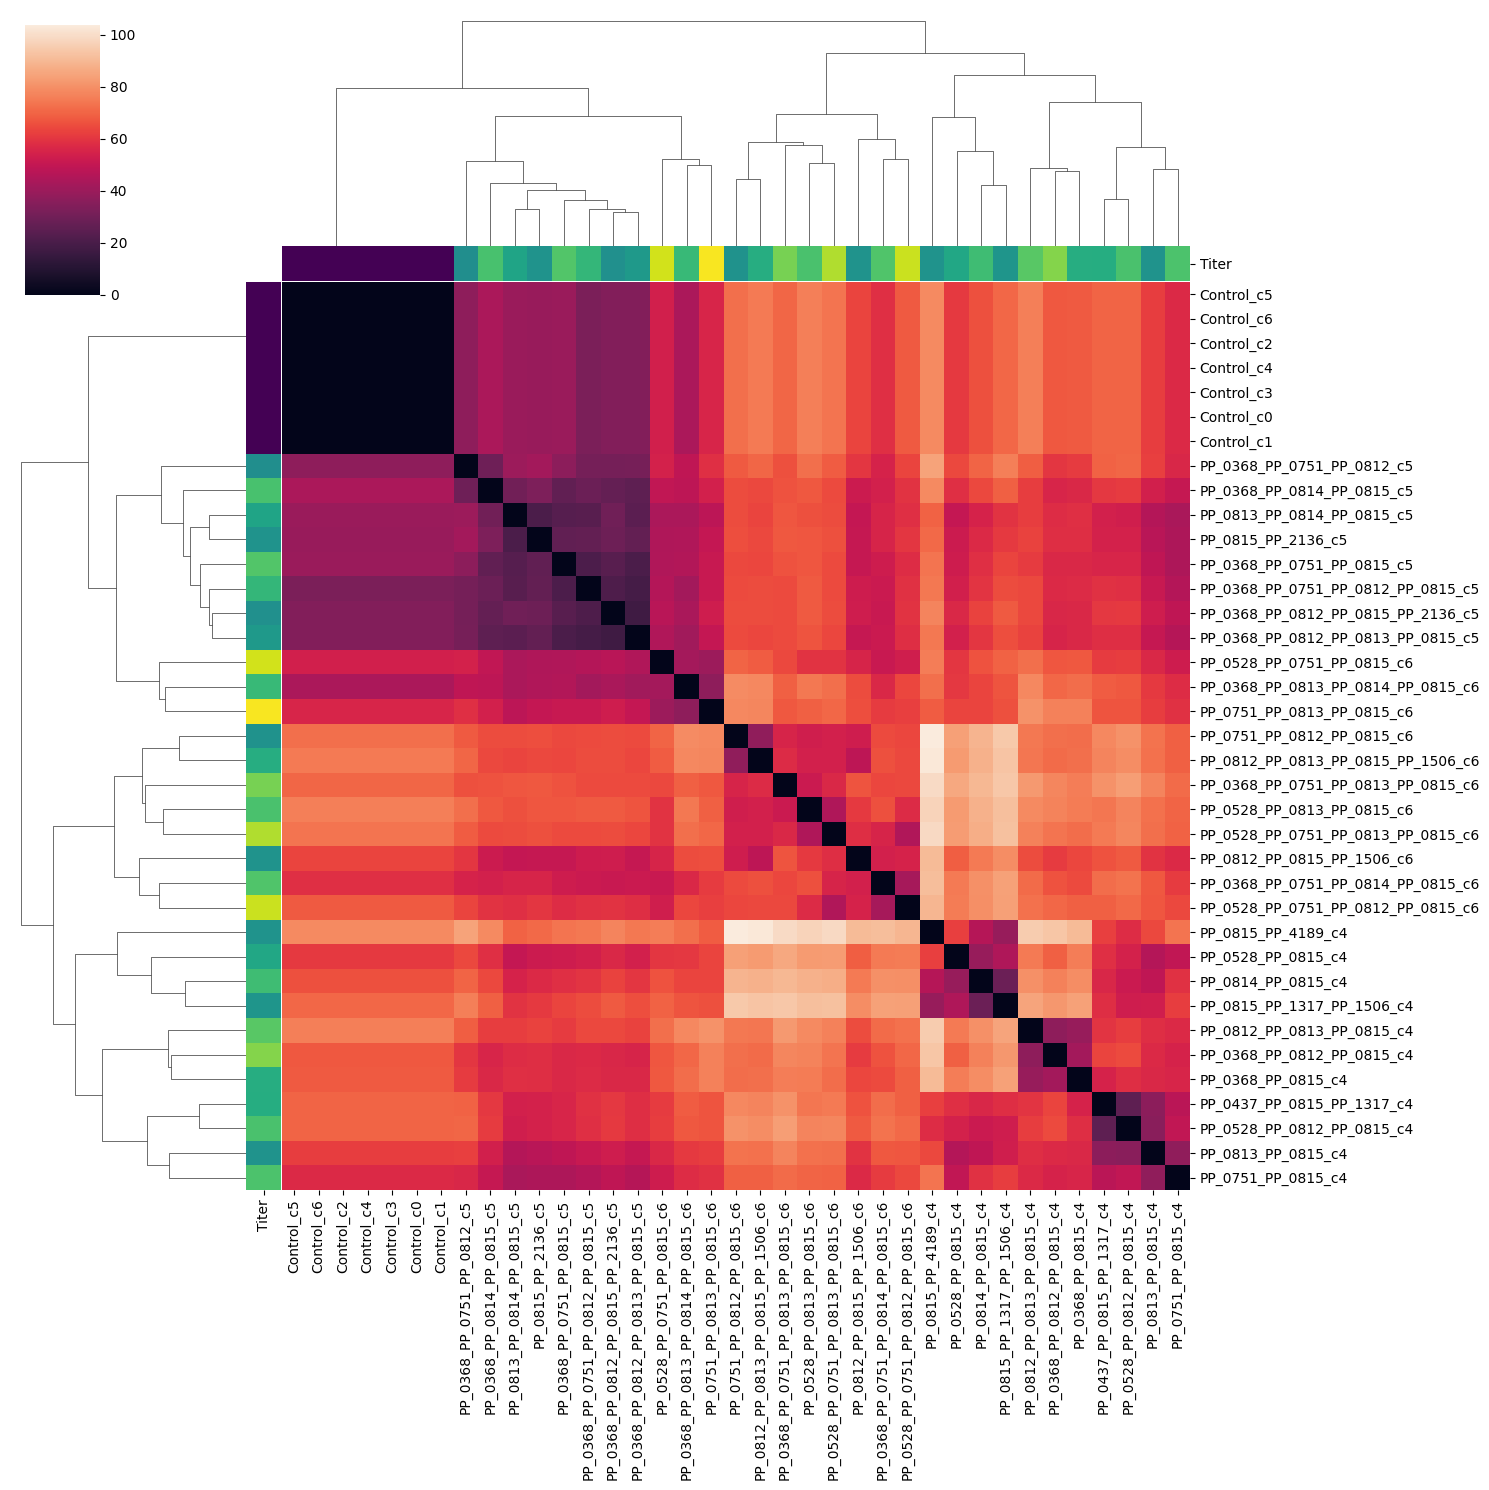

In [17]:
columns_to_compare = np.where([X_mean_norm_df.columns

high_dmat_compressed_subset = pdist(X_mean_norm[plot_idx,])
high_dmat = squareform(high_dmat_compressed)

titer_category_df = pd.DataFrame(y_mean[plot_idx])

scalar_map = cm.ScalarMappable(
    norm = mpl.colors.Normalize(vmin =2, vmax = 5),
    cmap = plt.get_cmap('viridis'),
)

titer_category_df.loc[:,'c_cont'] = titer_category_df['isoprenol'].apply(lambda x: scalar_map.to_rgba(x))
titer_colors = pd.Series(titer_category_df.loc[:,'c_cont'])
titer_colors.name = 'Titer'

high_dist_df = pd.DataFrame(data = high_dmat, columns = X_mean.index.values[plot_idx], index = X_mean.index.values[plot_idx])
c = sns.clustermap(
    data = high_dist_df,
    row_colors = titer_colors, 
    col_colors=titer_colors,
    figsize=(15,15)
)

## Replicate clustering
Here, I expand the funcitonality of the code by creating my own distance linkage (using scipy builtins) - therefore I can work with the clustering after I make the plot.

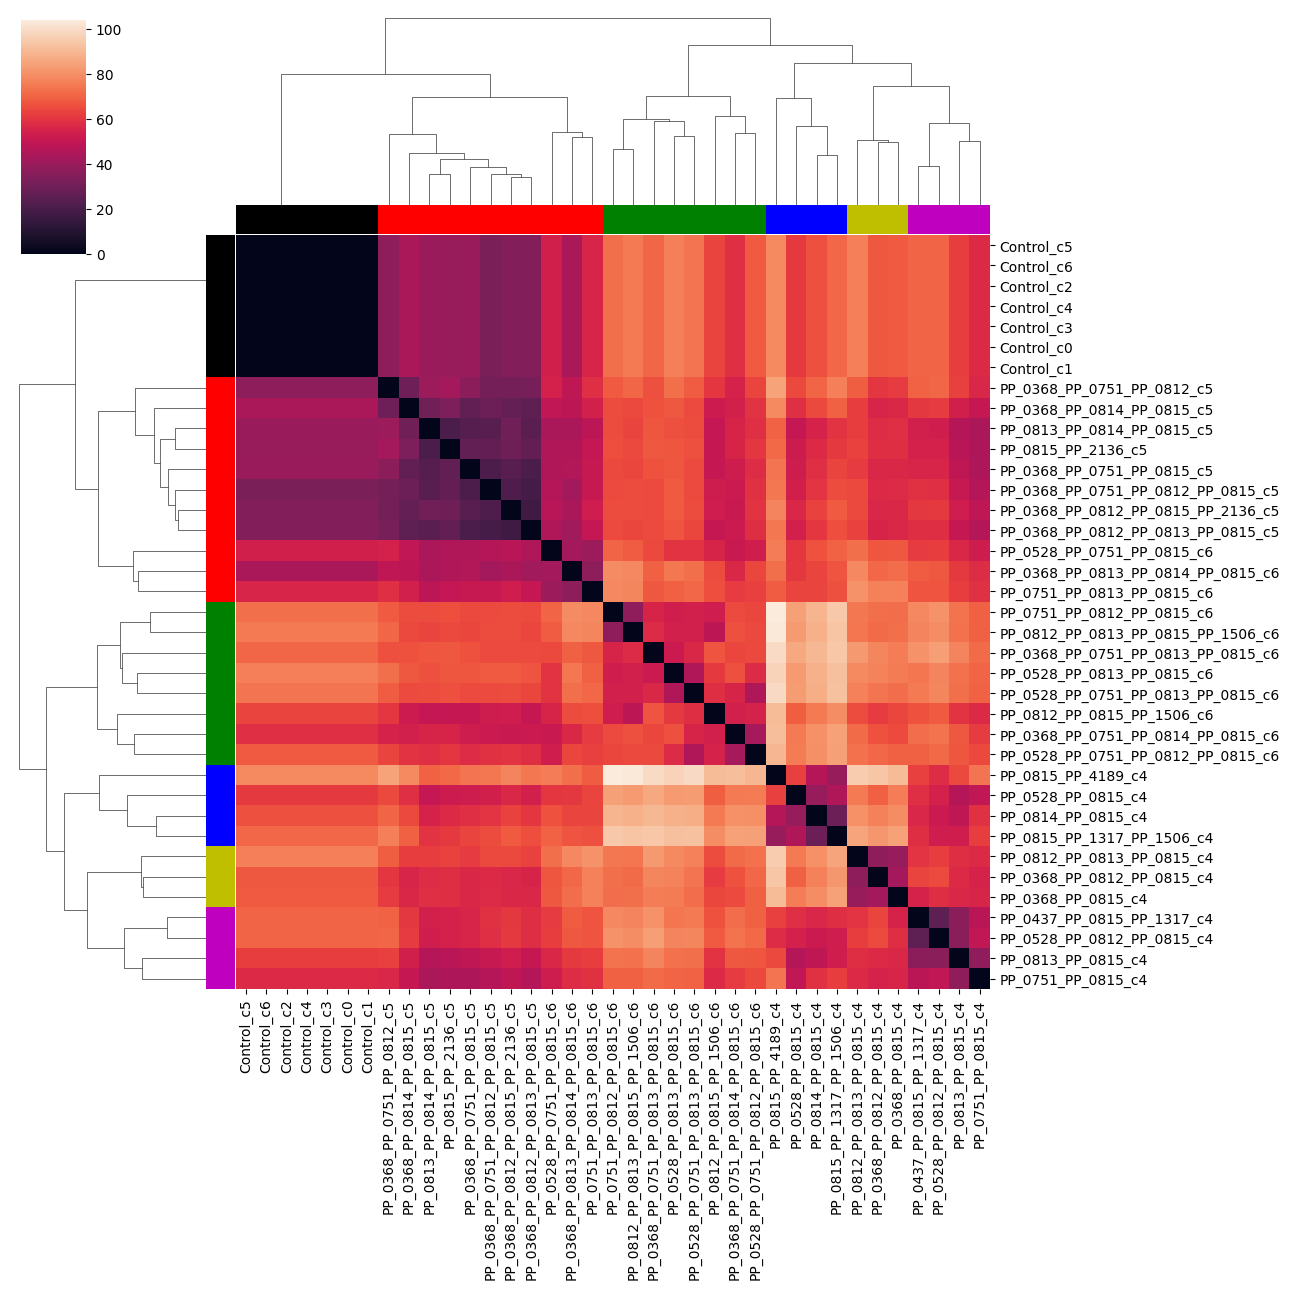

In [18]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

dist_linkage = hierarchy.linkage(
    distance.pdist(high_dist_df), method='average')

fc = hierarchy.fcluster(dist_linkage, t = 6, criterion='maxclust')
fc
c_all = 'krgbym'
fc_color = [c_all[int(x-1)] for x in fc]
sns.clustermap(high_dist_df, 
               row_linkage=dist_linkage,
               col_linkage=dist_linkage,
               row_colors=fc_color,
               method="average",
               col_colors=fc_color,
               figsize=(13, 13)
              )

### Create dataframe to hold cluster results

# THIS IS THE PROBLEM
I create a cluster_df based on the *mean* dataframe, give it a cluster_id. THEN I use that to make a `clustered_line_dict`, but it's super confusing because I then just remake a variable called `cluster_df`.

In [19]:
cluster_df = high_dist_df.copy()
cluster_df['cluster'] = fc

In [20]:
clustered_lines = [line[:-3] for line in cluster_df.columns]
clustered_lines = high_dist_df.columns
clustered_line_dict = dict(zip(clustered_lines, cluster_df.loc[:,'cluster']))
clustered_line_dict

{'Control_c0': 1,
 'Control_c1': 1,
 'Control_c2': 1,
 'Control_c3': 1,
 'Control_c4': 1,
 'Control_c5': 1,
 'Control_c6': 1,
 'PP_0368_PP_0751_PP_0812_c5': 2,
 'PP_0368_PP_0812_PP_0815_PP_2136_c5': 2,
 'PP_0751_PP_0812_PP_0815_c6': 3,
 'PP_0812_PP_0815_PP_1506_c6': 3,
 'PP_0368_PP_0813_PP_0814_PP_0815_c6': 2,
 'PP_0813_PP_0814_PP_0815_c5': 2,
 'PP_0368_PP_0751_PP_0815_c5': 2,
 'PP_0812_PP_0813_PP_0815_PP_1506_c6': 3,
 'PP_0813_PP_0815_c4': 6,
 'PP_0437_PP_0815_PP_1317_c4': 6,
 'PP_0368_PP_0751_PP_0812_PP_0815_c5': 2,
 'PP_0368_PP_0812_PP_0815_c4': 5,
 'PP_0814_PP_0815_c4': 4,
 'PP_0528_PP_0813_PP_0815_c6': 3,
 'PP_0812_PP_0813_PP_0815_c4': 5,
 'PP_0815_PP_1317_PP_1506_c4': 4,
 'PP_0528_PP_0815_c4': 4,
 'PP_0751_PP_0813_PP_0815_c6': 2,
 'PP_0528_PP_0812_PP_0815_c4': 6,
 'PP_0751_PP_0815_c4': 6,
 'PP_0368_PP_0751_PP_0813_PP_0815_c6': 3,
 'PP_0815_PP_2136_c5': 2,
 'PP_0528_PP_0751_PP_0815_c6': 2,
 'PP_0815_PP_4189_c4': 4,
 'PP_0368_PP_0812_PP_0813_PP_0815_c5': 2,
 'PP_0368_PP_0751_PP_081

In [21]:
cluster_df = omics.copy()
cluster_df['line_name'] = [f"{x.split('-')[0]}_c{x[-1]}" for x in cluster_df.index.values]
cluster_df['is_control'] = ['ontrol' in x for x in cluster_df['line_name']]
cluster_df.loc[cluster_df['is_control'], 'line_name'] = cluster_df.loc[
    cluster_df['is_control'], 'line_name'].apply(lambda x: f'Control_c{x[-1]}')
cluster_df['has_cluster'] = cluster_df['line_name'].apply(lambda x: x in clustered_lines)

cluster_df = cluster_df[cluster_df['has_cluster']]

cluster_df['cluster'] = cluster_df['line_name'].apply(lambda x: clustered_line_dict[x])
# cluster_df = cluster_df.drop(['line_name', 'is_control', 'has_cluster'], axis = 1)

cluster_df

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol,line_name,is_control,has_cluster,cluster
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392,Control_c0,True,True,1
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367,Control_c0,True,True,1
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920,Control_c0,True,True,1
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284,Control_c0,True,True,1
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501,Control_c0,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_0815_PP_2136-R2_c5,1.483004,0.455116,0.527055,1.001524,0.579934,0.954919,0.510812,0.600263,1.116737,1.236248,...,1.209638,0.664228,1.206559,1.229014,1.030521,3.505734,PP_0815_PP_2136_c5,False,True,2
PP_0815_PP_2136-R3_c5,1.423489,0.734009,0.611613,1.107580,0.579620,0.758004,0.439930,0.498927,0.981812,1.121260,...,0.446414,0.579263,1.101211,1.194512,1.081268,3.426804,PP_0815_PP_2136_c5,False,True,2
PP_0815_PP_4189-R1_c4,1.132156,0.871319,0.060076,0.218182,0.489499,0.597489,0.745851,0.004630,0.565950,0.790930,...,1.464361,0.950505,1.149569,0.602048,0.810483,3.461911,PP_0815_PP_4189_c4,False,True,4


## Define violin plot function

In [23]:
from scipy.stats import ttest_ind
# from statsmodels.stats.multitest import multipletests

In [25]:
def volcano_plot(data1,
                 data2,
                 neglog10pval_thresh = 0.001,
                 log2fc_thresh = 3,
                 title_text = None,
                 label_flag = False,
                 select_proteins = None,
                 adj_pvals = True,
                 plot = True,
                 figsize = (10,10)
                ):
    # data1 and data2 are 
    common_columns = list(set(data1.columns).intersection(set(data2.columns)))
    df = pd.DataFrame(columns = ['prot', 'log2fc', 'pval', 'pval_adj', 'neglog10p'], index = common_columns)
    for c in common_columns:
        l2fc = np.log2(np.mean(data2.loc[:, c])/np.mean(data1.loc[:,c]))
        pval = ttest_ind(data1.loc[:,c], data2.loc[:,c])[1]
        # nl10p = -np.log10(
        #     pval            
        # )
        
        df.loc[c,:] = [c, l2fc, pval, np.nan, np.nan]
    #COMMENT THIS IN WHEN YOU HAVE INTERNET!!!!
    # reject, pvals_corrected, _, _ = multipletests(
    #                                     df['pval'].values,
    #                                     alpha=0.05,
    #                                     method='fdr_bh',
    #                                     maxiter=1,
    #                                     is_sorted=False,
    #                                     returnsorted=False
    #                                 )
    # df.loc[:, 'pval_adj'] = pvals_corrected
    
    if adj_pvals:
        df.loc[:, 'neglog10p'] = -np.log10(df.loc[:, 'pval_adj'].astype(np.float64))
    else:
        df.loc[:, 'neglog10p'] = -np.log10(df.loc[:, 'pval'].astype(np.float64))
        
        
    df.loc[:, 'significant'] = (
        (np.abs(df.loc[:,'log2fc'])>log2fc_thresh) & 
        (df.loc[:,'neglog10p']>neglog10pval_thresh)
    )

    df.loc[:, 'selected'] = False
    if select_proteins is not None:
        df.loc[:, 'selected'] = df['prot'].isin(select_proteins)

    df.loc[:, 'color'] = 'black'
    df.loc[df['significant'],'color'] = 'red'
    df.loc[df['selected'], 'color'] = 'blue'
    
    
    if plot:            
        fig, ax = plt.subplots(figsize = figsize)
        line_params = {'linestyle': '--', 'color': 'k', 'linewidth': 0.5} 
        ax.axvline(np.abs(log2fc_thresh), **line_params)
        ax.axvline(-np.abs(log2fc_thresh), **line_params)
        ax.axhline(np.abs(neglog10pval_thresh), **line_params)
        if title_text:
            ax.set_title(title_text)
        sns.scatterplot(data = df[df['color'] == 'black'], x = 'log2fc', y = 'neglog10p', edgecolors = 'k', alpha = 0.1, color = 'k')
        sns.scatterplot(data = df[df['color'] == 'red'], x = 'log2fc', y = 'neglog10p', edgecolors = 'k', color = 'r')
        sns.scatterplot(data = df[df['color'] == 'blue'], x = 'log2fc', y = 'neglog10p', edgecolors = 'k', color = 'b')

        if adj_pvals: 
            ylabel = r'$-log_{10}(Adj. p-val)$'
        else: 
            ylabel = r'$-log_{10}(p-val)$'

        ax.set_xlabel('log2(fold change)')
        ax.set_ylabel(ylabel)
        if label_flag:
            label_idx_sig = (
                (np.abs(df.loc[:,'log2fc'])>log2fc_thresh) & 
                (df.loc[:,'neglog10p']>neglog10pval_thresh)
            )
            label_idx = label_idx_sig | df['selected']
            text_x = df.loc[label_idx, 'log2fc'].values
            text_y = df.loc[label_idx, 'neglog10p'].values
            text_lbl = df.loc[label_idx, 'prot'].values

            text_list = [plt.text(text_x[i], text_y[i], text_lbl[i], fontsize = 10) for i in range(sum(label_idx))]


            adjust_text(text_list, arrowprops=dict(arrowstyle='-', color='red', lw=1)) 
        else:
            select_proteins_label_idx = df['significant']
            sns.scatterplot(data = df[select_proteins_label_idx], x = 'log2fc', y = 'neglog10p', edgecolors = 'k', color = 'b')

            select_proteins_x = df.loc[select_proteins_label_idx, 'log2fc'].values
            select_proteins_y = df.loc[select_proteins_label_idx, 'neglog10p'].values
            select_proteins_lbl = df.loc[select_proteins_label_idx, 'prot'].values
            select_proteins_text_list = [plt.text(select_proteins_x[i], select_proteins_y[i], select_proteins_lbl[i], fontsize = 10) for i in range(sum(select_proteins_label_idx))]
            adjust_text(select_proteins_text_list, arrowprops=dict(arrowstyle='-', color='blue', lw=1))


    return df

## Use violin plot function to find DEGs for each top strain



In [ ]:
"""
cluster_compare = 2
cluster_baseline = 1
crispri_targets_in_cluster_compare = ct_df.loc[ct_df['cluster'] == cluster_compare, 'target'].unique()
title_text = f'Cluster {cluster_compare} enriched compared to Control Cluster'

volcano_df_adj = volcano_plot(
    data1 = cluster_df.loc[cluster_df['cluster'] == cluster_baseline, protein_measurements],
    data2 = cluster_df.loc[cluster_df['cluster'] == cluster_compare, protein_measurements],
    log2fc_thresh=3,
    neglog10pval_thresh=-np.log10(0.0001),
    label_flag = True,
    title_text=title_text,
    select_proteins=crispri_targets_in_cluster_compare,
    adj_pvals = True,
    figsize=(6,6)
)
"""

In [44]:
cluster_df.loc[cluster_df['line_name'] == line_name, protein_measurements]
cluster_df.loc[cluster_df['is_control'], protein_measurements]

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.950618,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.020609,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.985870,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.029636,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.063534,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Control_P4-R3_c2,1.089375,0.509442,0.000000,0.587780,0.673706,0.252708,0.855320,1.097956,0.634173,0.842136,...,0.857829,0.807067,0.892321,0.976635,1.068417,1.227428,1.037913,0.892888,0.622024,1.125129
Control_P4-R3_c3,1.184088,1.580289,0.509986,1.165826,0.712555,1.626113,1.115151,0.918538,1.597528,0.888244,...,1.139768,1.192711,1.111750,1.031399,1.082561,1.451584,0.885360,1.090057,0.973286,1.092413
Control_P4-R3_c4,0.699791,0.722622,0.000000,0.881621,0.996527,0.000000,1.056549,0.000000,1.175704,0.289458,...,0.659852,0.514699,0.602603,0.985000,0.791953,1.882750,1.347809,0.937613,1.084030,0.877139


In [62]:
diff_expr_prot = set()
control_prot = cluster_df.loc[cluster_df['is_control'], protein_measurements]

for i, line_name in enumerate(cluster_df.loc[~cluster_df['is_control'], 'line_name'].unique()):
    print(f'i = {i+1}, len(DEP) = {len(diff_expr_prot)}')
    test_prot = cluster_df.loc[cluster_df['line_name'] == line_name, protein_measurements]
    volcano_df = volcano_plot(
        data1 = control_prot,
        data2 = test_prot,
        log2fc_thresh=3,
        neglog10pval_thresh=-np.log10(0.0001),
        plot = False,
        adj_pvals = False, # CHANGE THIS WHEN YOU HAVE INTERNET
    )
    [diff_expr_prot.add(x) for x in volcano_df.loc[volcano_df['significant'], 'prot'].values]
            
diff_expr_prot = list(diff_expr_prot)    
print(f'Final DEP list - len = {len(diff_expr_prot)}')


i = 1, len(DEP) = 0
i = 2, len(DEP) = 8
i = 3, len(DEP) = 13
i = 4, len(DEP) = 53
i = 5, len(DEP) = 66
i = 6, len(DEP) = 68
i = 7, len(DEP) = 69
i = 8, len(DEP) = 93
i = 9, len(DEP) = 95
i = 10, len(DEP) = 98
i = 11, len(DEP) = 99
i = 12, len(DEP) = 108
i = 13, len(DEP) = 119
i = 14, len(DEP) = 128
i = 15, len(DEP) = 139
i = 16, len(DEP) = 143
i = 17, len(DEP) = 149
i = 18, len(DEP) = 153
i = 19, len(DEP) = 159
i = 20, len(DEP) = 166
i = 21, len(DEP) = 169
i = 22, len(DEP) = 171
i = 23, len(DEP) = 178
i = 24, len(DEP) = 183
i = 25, len(DEP) = 186
i = 26, len(DEP) = 186
i = 27, len(DEP) = 186
i = 28, len(DEP) = 191
i = 29, len(DEP) = 207
i = 30, len(DEP) = 208
Final DEP list - len = 222


Create dataframe to do clustering on


In [72]:
diff_expr_prot_idx = [np.where(p == cluster_df.columns)[0][0] for p in diff_expr_prot]

In [85]:
X_mean_norm_subset[plot_idx,:].shape

(37, 222)

In [86]:
X_mean_norm_subset = X_mean_norm[:, diff_expr_prot_idx]
high_dmat_compressed_subset = pdist(X_mean_norm_subset[plot_idx,:])
high_dmat_subset = squareform(high_dmat_compressed_subset)

high_dist_df_subset = pd.DataFrame(data = high_dmat_subset, columns = X_mean.index.values[plot_idx], index = X_mean.index.values[plot_idx])

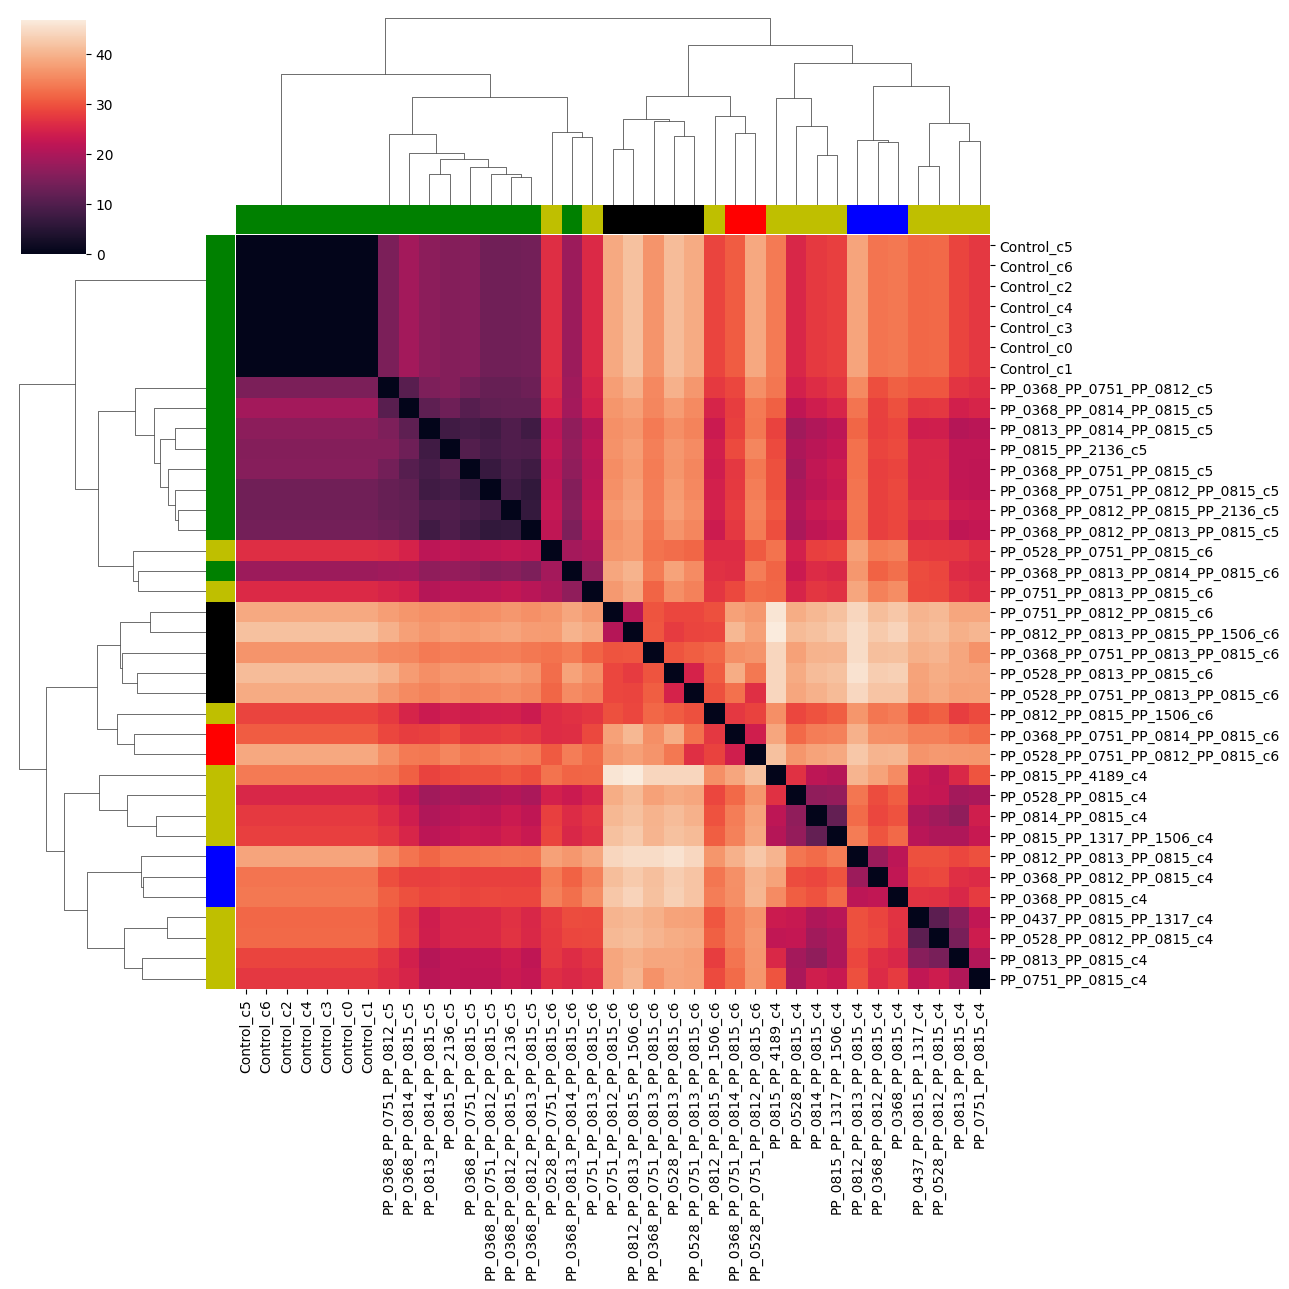

In [88]:
dist_linkage_subset = hierarchy.linkage(
    distance.pdist(high_dist_df_subset), method='average')

fc_subset = hierarchy.fcluster(dist_linkage_subset, t = 5, criterion='maxclust')
fc
c_all = 'krgbym'
fc_color_subset = [c_all[int(x-1)] for x in fc_subset]
sns.clustermap(high_dist_df_subset, 
               row_linkage=dist_linkage,
               col_linkage=dist_linkage,
               row_colors=fc_color_subset,
               method="average",
               col_colors=fc_color_subset,
               figsize=(13, 13)
              )

In [89]:
cluster_df['cluster_subset'] = fc_subset
clustered_lines_subset = [line[:-3] for line in cluster_df.columns]


clustered_line_dict_subset = dict(zip(clustered_lines_subset, cluster_df_subset.loc[:,'cluster']))
clustered_line_dict_subset

ValueError: Length of values (37) does not match length of index (180)